In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

import warnings
warnings.filterwarnings("ignore")

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Runge-Kutta methods</h1>

In [10]:
b2 = 1/2
c2 = 1/(2*b2)
b1 = 1 - b2

def RK_2(t_c, y_t):
    K1 = f(t_c-dt, y_t[-1])
    K2 = f(t_c-dt+dt*c2, y_t[-1] + dt*c2*K1)
    
    return y_t[-1] + dt * (b1*K1 + b2*K2)

In [11]:
def RK_4(t_c, y_t):
    K1 = f(t_c-dt, y_t[-1])
    K2 = f(t_c-dt + dt/2, y_t[-1] + dt/2*K1)
    K3 = f(t_c-dt + dt/2, y_t[-1] + dt/2*K2)
    K4 = f(t_c-dt + dt, y_t[-1] + dt*K3)
    
    return y_t[-1] + dt/6 * (K1 + 2*K2 + 2*K3 + K4)

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Testing</h1>

### 1st degree ODEs

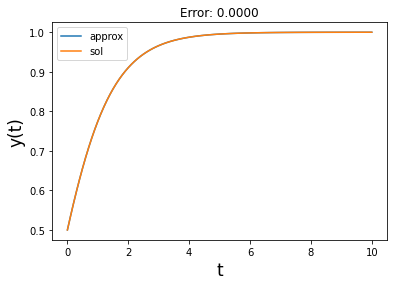

In [12]:
### Functions
fs = [
    (lambda t, y: -y*np.log(y), lambda t: np.exp(-np.exp(np.log(np.log(2))-t)), 0.5),
    (lambda t, y: -np.exp(-(t+y)), lambda t: np.log(np.e + np.exp(-t) - 1), 1),
    (lambda t, y: y*(1-y), lambda t: np.exp(t)/(1+np.exp(t)), 0.5),
    (lambda t, y: 16*y*(1-y), lambda t: (np.exp(16*t - np.log(1023))/(1+np.exp(16*t-np.log(1023)))), 1/1024)
]

### Method used
method = RK_4

### Current function
f, sol, y = fs[0]

# Time interval
dt = 0.1

# Time range
t0 = 0
T = 10
t = np.arange(t0, T+dt, dt)

y_t = [y]

# Algorithm
for t_c in t[1:]:
    y = method(t_c, y_t)
    y_t.append(y)
    
plt.plot(t, y_t, label='approx')
plt.plot(t, sol(t), label='sol')

plt.title(f"Error: {np.max(np.abs(y_t - sol(t))):.4f}")
plt.xlabel('t', fontsize = 17)
plt.ylabel('y(t)', fontsize = 17)

plt.legend()
plt.show()

### Order of convergence

array([0.        , 0.        , 4.00896646, 4.00374203])

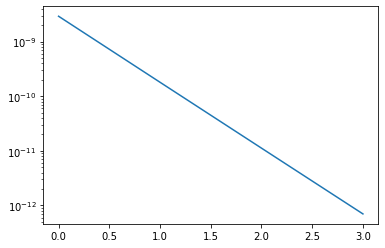

In [14]:
dt = 0.1
iterations = 4

p = np.zeros((iterations,))
err = np.zeros((iterations,))

for i in range(iterations):
    dt /= 2
    
    t = np.arange(t0, T+dt, dt)
    
    f, sol, y = fs[2]
    
    y_t = [y]

    # Algorithm
    for t_c in t[1:]:
        y = method(t_c, y_t)
        y_t.append(y)
        
    err[i] = np.max(np.abs(y_t - sol(t)))
    
    if i > 1:
        p[i] = np.log2(err[i-1]/err[i])
        
# plt.semilogy(err)   
p

### Harmonic oscillator

$$
\begin{bmatrix}
y\\ y'
\end{bmatrix}'=
\begin{bmatrix}
0 & 1 \\ -\omega^2 & 0
\end{bmatrix}
\begin{bmatrix}
y\\ y'
\end{bmatrix}
$$

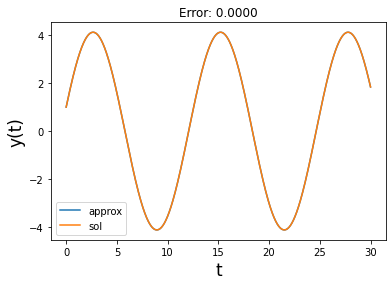

In [32]:
# Parameters
x0 = 1
y0 = 4
omega = 0.5

# Oscillator
f = lambda t, y: np.array([[0, 1], [-omega**2, 0]]) @ y

# Solution
sol = lambda t: x0*np.cos(omega*t) + y0*np.sin(omega*t)

# Time interval
dt = 0.01

# Time range
t0 = 0
T = 30
t = np.arange(t0, T+dt, dt)

# Initial condition
y = np.array([[x0, y0*omega]])
y_t = y

# Algorithm
for t_c in t[1:]:
    y = RK_4(t_c, y_t)
    y_t = np.append(y_t, [y], axis=0)

# Plot 
y_tx = y_t[:, 0]

plt.plot(t, y_tx, label='approx')
plt.plot(t, sol(t), label='sol')

plt.title(f"Error: {np.max(np.abs(y_tx - sol(t))):.4f}")
plt.xlabel('t', fontsize = 17)
plt.ylabel('y(t)', fontsize = 17)

plt.legend()
plt.show()

### Lokta-Volterra 

$$y'_1 = \alpha y_1 - \beta y_1y_2$$
$$y'_2 = -\gamma y_2 + \delta y_1y_2$$

$$\alpha = 0.25, \beta = 0.01, \gamma = 1, \delta = 0.01, y_1(0) = 80, y_2(0) = 30, t\in[0,30]$$

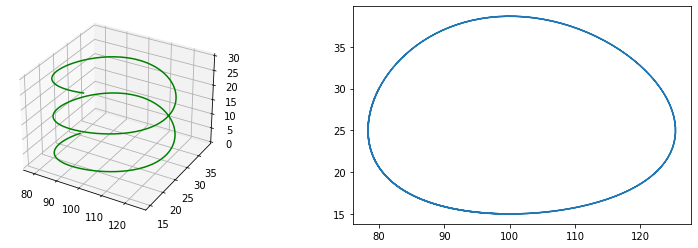

In [35]:
# Function y' = f(t, y(t))
alpha = 0.25
beta = 0.01
gamma = 1
delta = 0.01

f = lambda t, y: np.array([alpha*y[0] - beta*y[0]*y[1], -gamma*y[1] + delta*y[0]*y[1]])

# Time interval
dt = 0.1

# Time range
t0 = 0
T = 30
t = np.arange(t0, T+dt, dt)

# Initial condition
y = np.array([[80, 30]])
y_t = y

# Algorithm
for t_c in t[1:]:
    y = RK_2(t_c, y_t)
    y_t = np.append(y_t, [y], axis=0)

# Plot of 2d curve
y_tx = y_t[:, 0]
y_ty = y_t[:, 1]

fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D (y_tx, y_ty, t, 'green')

ax = fig.add_subplot(1, 2, 2)
ax.plot(y_tx, y_ty)

plt.show()

### Van der Pol

$$y'_1 = y_2 - y_1^3 + y_1$$
$$y_2' = -y_1$$

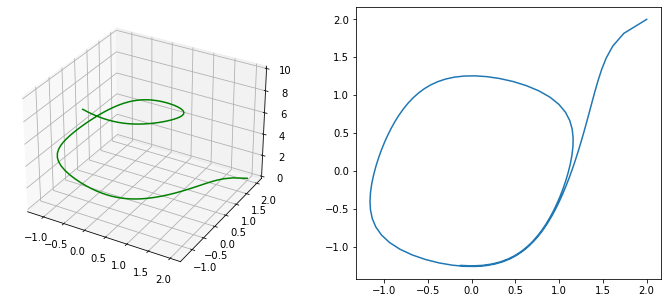

In [36]:
# Function 
f = lambda t, y: np.array([y[1] - y[0]**3 + y[0], -y[0]])

# Time interval
dt = 0.1

# Time range
t0 = 0
T = 10
t = np.arange(t0, T+dt, dt)

# Initial condition
y = np.array([[2, 2]])
y_t = y

# Algorithm
for t_c in t[1:]:
    y = RK_4(t_c, y_t)
    y_t = np.append(y_t, [y], axis=0)

# Plot of 2d curve
y_tx = y_t[:, 0]
y_ty = y_t[:, 1]

fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D (y_tx, y_ty, t, 'green')

ax = fig.add_subplot(1, 2, 2)
ax.plot(y_tx, y_ty)

plt.show()